In [187]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../src')

from hamiltonian import *
from misc import *
from haldane_pseudopotential import *
from plotting import *

In [188]:
#simulation parameters
#for MR_Pf state, v=5/2 and S=3
#N_phi=2(N_e)-3 for LL=2
N = 10
filling_factor_inv = 2
top_shift=3
Nphi = filling_factor_inv*N-top_shift

print('N_phi=',Nphi, 'flux quanta for N_e=',N,'electrons')

N_phi= 17 flux quanta for N_e= 10 electrons


In [189]:
#initialization (system configurations and parameters)
system = system(N, Nphi,0,True)

========Initializing possible states in spherical geometry========
completed in 0.08434319496154785 seconds
N = 10 electrons
Nphi = 17 flux quanta

========Constructing total angular momentum matrix========
 
completed in 1.4407968521118164 seconds


## Pseudopotential and Hamiltonian Construction

In [190]:
#pseudopotentials

#trial pseudopotential according to Greiter et al
trial_pp=np.array([0,1,0,1])
trial_pp=np.append(trial_pp, np.zeros((Nphi+1)-len(trial_pp)))
trial_pp = haldane_pseudopotential(system.Q, LLn = 1,custom=trial_pp)

#Coulomb pseudopotentials
pp = haldane_pseudopotential(system.Q, LLn = 1)

========Initializing interaction matrix========
Working on interaction matrix: 0.0 %
Working on interaction matrix: 5.555555555555555 %
Working on interaction matrix: 11.11111111111111 %
Working on interaction matrix: 16.666666666666664 %
Working on interaction matrix: 22.22222222222222 %
Working on interaction matrix: 27.77777777777778 %
Working on interaction matrix: 33.33333333333333 %
Working on interaction matrix: 38.88888888888889 %
Working on interaction matrix: 44.44444444444444 %
Working on interaction matrix: 50.0 %
Working on interaction matrix: 55.55555555555556 %
Working on interaction matrix: 61.111111111111114 %
Working on interaction matrix: 66.66666666666666 %
Working on interaction matrix: 72.22222222222221 %
Working on interaction matrix: 77.77777777777779 %
Working on interaction matrix: 83.33333333333334 %
Working on interaction matrix: 88.88888888888889 %
Working on interaction matrix: 94.44444444444444 %
completed in  25.01554298400879 seconds

========Initializi

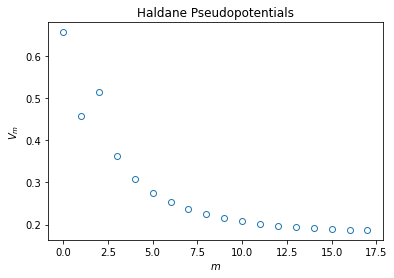

In [191]:
ax=plt.plot(pp.m, pp.V, ls="none", marker="o", mfc="none", label="$n=0$")
#ax=plt.plot(pp1.m, pp1.V, ls="none", marker="o", mfc="none", label="$trial$")
#ax=plt.plot(pp1.m, pp1.V, ls="none", marker="o", mfc="none", label="$trial$")
plt.xlabel('$m$')
plt.ylabel('$V_m$')
plt.title('Haldane Pseudopotentials')

plt.show()

========Constructing Hamiltonian of size 1514 x 1514 ========
Working on interaction matrix: 0.0 %
Working on interaction matrix: 5.019815059445178 %
Working on interaction matrix: 10.039630118890356 %
Working on interaction matrix: 15.059445178335535 %
Working on interaction matrix: 20.079260237780712 %
Working on interaction matrix: 25.09907529722589 %
Working on interaction matrix: 30.11889035667107 %
Working on interaction matrix: 35.13870541611625 %
Working on interaction matrix: 40.158520475561424 %
Working on interaction matrix: 45.1783355350066 %
Working on interaction matrix: 50.19815059445178 %
Working on interaction matrix: 55.21796565389696 %
Working on interaction matrix: 60.23778071334214 %
Working on interaction matrix: 65.25759577278731 %
Working on interaction matrix: 70.2774108322325 %
Working on interaction matrix: 75.29722589167768 %
Working on interaction matrix: 80.31704095112285 %
Working on interaction matrix: 85.33685601056803 %
Working on interaction matrix: 9

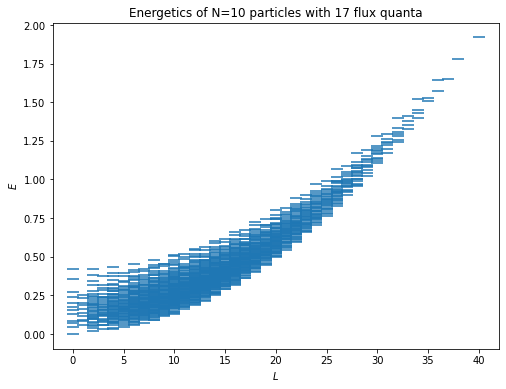

In [192]:
#create hamiltonian and diagonalize coulomb interaction
hamiltonian = spherical_system(system, pp.pp_matrix)
hamil=hamiltonian.h.A
L2=system.L2.A

#diagonalize for eigenstates for wf overlap
energies, eigenstates=LA.eigh(hamil)

plot_L2_spectrum(hamil,L2,title=f'Energetics of N={N} particles with {Nphi} flux quanta',figsize=(8,6),sorted=False, lim=50)

In [213]:
trial_hamiltonian = spherical_system(system, trial_pp.pp_matrix)
trial_hamil=trial_hamiltonian.h.A
trial_energies, trial_eigenstates=LA.eigh(trial_hamil)

overlap_Vectors(trial_eigenstates[:,0],eigenstates[:,0])

========Constructing Hamiltonian of size 1514 x 1514 ========
Working on interaction matrix: 0.0 %
Working on interaction matrix: 5.019815059445178 %
Working on interaction matrix: 10.039630118890356 %
Working on interaction matrix: 15.059445178335535 %
Working on interaction matrix: 20.079260237780712 %
Working on interaction matrix: 25.09907529722589 %
Working on interaction matrix: 30.11889035667107 %
Working on interaction matrix: 35.13870541611625 %
Working on interaction matrix: 40.158520475561424 %
Working on interaction matrix: 45.1783355350066 %
Working on interaction matrix: 50.19815059445178 %
Working on interaction matrix: 55.21796565389696 %
Working on interaction matrix: 60.23778071334214 %
Working on interaction matrix: 65.25759577278731 %
Working on interaction matrix: 70.2774108322325 %
Working on interaction matrix: 75.29722589167768 %
Working on interaction matrix: 80.31704095112285 %
Working on interaction matrix: 85.33685601056803 %
Working on interaction matrix: 9

0.8350725707367439

========Initializing interaction matrix========
Working on interaction matrix: 0.0 %
Working on interaction matrix: 5.555555555555555 %
Working on interaction matrix: 11.11111111111111 %
Working on interaction matrix: 16.666666666666664 %
Working on interaction matrix: 22.22222222222222 %
Working on interaction matrix: 27.77777777777778 %
Working on interaction matrix: 33.33333333333333 %
Working on interaction matrix: 38.88888888888889 %
Working on interaction matrix: 44.44444444444444 %
Working on interaction matrix: 50.0 %
Working on interaction matrix: 55.55555555555556 %
Working on interaction matrix: 61.111111111111114 %
Working on interaction matrix: 66.66666666666666 %
Working on interaction matrix: 72.22222222222221 %
Working on interaction matrix: 77.77777777777779 %
Working on interaction matrix: 83.33333333333334 %
Working on interaction matrix: 88.88888888888889 %
Working on interaction matrix: 94.44444444444444 %
completed in  25.18774676322937 seconds

========Constructi

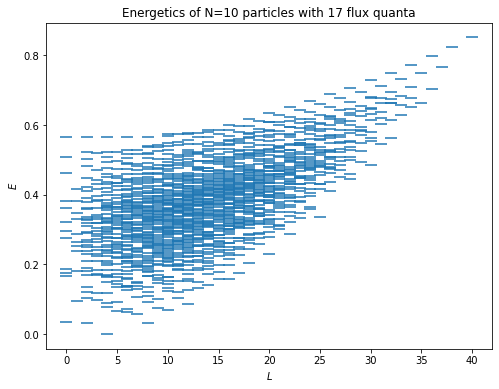

In [8]:
noise_pp=np.array([0,0.1])
noise_pp=np.append(noise_pp, np.zeros((Nphi+1)-len(noise_pp)))

noise_pp = haldane_pseudopotential(system.Q, LLn = 1,custom=noise_pp)


#create hamiltonian and diagonalize coulomb interaction
test_hamiltonian = spherical_system(system, noise_pp.pp_matrix)
test_hamil=test_hamiltonian.h.A
L2=system.L2.A

#diagonalize for eigenstates for wf overlap
test_energies,test_eigenstates=LA.eigh(test_hamil)

plot_L2_spectrum(test_hamil,L2,title=f'Energetics of N={N} particles with {Nphi} flux quanta',figsize=(8,6),sorted=False, lim=50)

## Gaussian White Noise (Disordered 5/2)

In [10]:
#np.save('MR_Nphi17_CoulombHamil',hamil)
#np.save('MR_Nphi17_TrialHamil',trial_hamil)

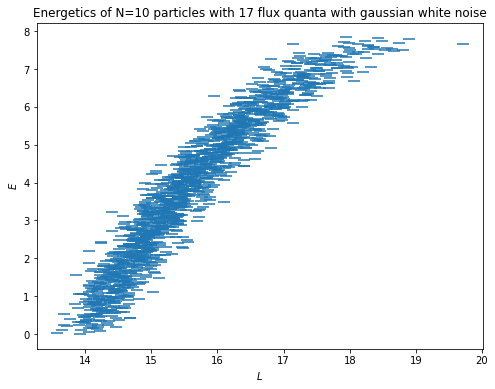

overlap of wavefunciton <Ψtrial|Ψexact>= 0.09285674930313406


In [194]:
#create noisy hamiltonian with gaussian white noise of specified width
width=0.05

noise_hamil=hamil+np.random.normal(0,width,hamil.shape)
noise_energies, noise_eigenstates=LA.eigh(noise_hamil)

plot_L2_spectrum(hamil=noise_hamil,
                 L2=system.L2.A,
                 title=f'Energetics of N={N} particles with {Nphi} flux quanta with gaussian white noise',
                 figsize=(8,6),sorted=False, 
                 lim=50)

noise_overlap=overlap_Vectors(np.transpose(eigenstates)[0],np.transpose(noise_eigenstates)[0])

# Entanglement Spectrum

In [227]:
Norb=18
mzvals=system.mzvals
subsystemA = np.arange(11,18,dtype=int)
NA=int(4)
LzAvec = np.arange(sum(mzvals[subsystemA][0:NA]),sum(mzvals[subsystemA][NA-1::])+1) #noninclusive endpoint 

Calculating entanglement spectrum for NA = 4, LzA = [16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.] ...
Calculating entanglement spectrum for NA = 4, LzA = [16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.] ...


'\n#trial Hamiltonian\ntrial_ent_spec=system.entanglement_spectrum(trial_eigenstates[0],subsystemA,NA,LzAvec)\nfig, ax = plt.subplots()\nax=plt.plot(trial_ent_spec[:,0], trial_ent_spec[:,1], ls="none", marker="_", ms="12", mew="1.5")'

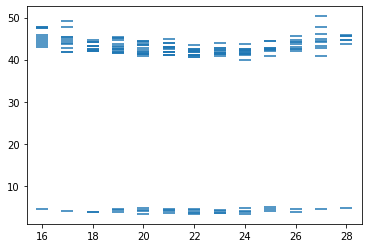

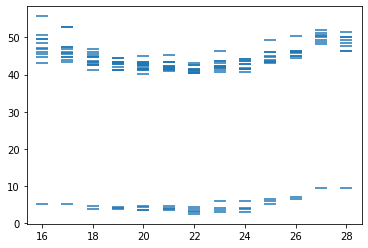

In [204]:
#plotting energetics for disordered hamiltonian

#disordered Hamiltonian
disordered_ent_spec=system.entanglement_spectrum(noise_eigenstates[:,0],subsystemA,NA,LzAvec)
fig, ax = plt.subplots()
ax=plt.plot(disordered_ent_spec[:,0], disordered_ent_spec[:,1], ls="none", marker="_", ms="12", mew="1.5")

#pure Hamiltonian
ent_spec=system.entanglement_spectrum(eigenstates[:,0],subsystemA,NA,LzAvec)
fig, ax = plt.subplots()
ax=plt.plot(ent_spec[:,0], ent_spec[:,1], ls="none", marker="_", ms="12", mew="1.5")
"""
#trial Hamiltonian
trial_ent_spec=system.entanglement_spectrum(trial_eigenstates[0],subsystemA,NA,LzAvec)
fig, ax = plt.subplots()
ax=plt.plot(trial_ent_spec[:,0], trial_ent_spec[:,1], ls="none", marker="_", ms="12", mew="1.5")"""

In [53]:
eta=np.real(disordered_ent_spec[:,1])
SA=sum(eta*np.exp(-eta))
SA

0

In [17]:
eta=np.real(trial_ent_spec[:,1])
S_trial=sum(eta*np.exp(-eta))
S_trial

2.481983086750867

### Calculating delta $S = S_{E} - S_{E,model}$

In [83]:
noise_strength = np.arange(0.0,0.1,0.005)
h_dimension = hamil.shape

def get_entanglement_entropy(eta):
    eta = np.real(eta)
    return sum(eta*np.exp(-eta))

def average(lst):
    return sum(lst) / len(lst)

delta_S = np.array([])
S_E = np.array([])
S_E_model=np.array([])

for width in noise_strength:
    S_E_val=[]
    S_E_model_val=[]

    for i in range(0,10):
        noise_energies,noise_eigenstates = LA.eigh(hamil+np.random.normal(0,width,h_dimension),subset_by_index=[0,0])
        disordered_ent_spec=system.entanglement_spectrum(noise_eigenstates,subsystemA,NA,LzAvec)

        noise_trial_energies,noise_trial_eigenstates = LA.eigh(trial_hamil+np.random.normal(0,width,h_dimension),subset_by_index=[0,0])
        disordered_trial_ent_spec=system.entanglement_spectrum(noise_trial_eigenstates,subsystemA,NA,LzAvec)

        S_E_val.append(get_entanglement_entropy(disordered_ent_spec[:,1]))
        S_E_model_val.append(get_entanglement_entropy(disordered_trial_ent_spec[:,1]))

    S_E = np.append(S_E, average(S_E_val))
    S_E_model=np.append(S_E_model, average(S_E_model_val))



Calculating entanglement spectrum for NA = 5, LzA = [12.5 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5
 26.5 27.5 28.5 29.5 30.5 31.5] ...
Calculating entanglement spectrum for NA = 5, LzA = [12.5 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5
 26.5 27.5 28.5 29.5 30.5 31.5] ...
Calculating entanglement spectrum for NA = 5, LzA = [12.5 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5
 26.5 27.5 28.5 29.5 30.5 31.5] ...
Calculating entanglement spectrum for NA = 5, LzA = [12.5 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5
 26.5 27.5 28.5 29.5 30.5 31.5] ...
Calculating entanglement spectrum for NA = 5, LzA = [12.5 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5
 26.5 27.5 28.5 29.5 30.5 31.5] ...
Calculating entanglement spectrum for NA = 5, LzA = [12.5 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5
 26.5 27.5 28.5 29.5 30.5 31.5] ...
Calculating entanglement spectrum for NA = 5, 

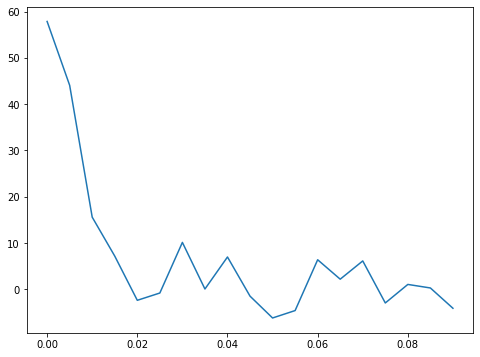

In [95]:
dx=noise_strength[1]-noise_strength[0]
dydx = np.diff(S_E)/dx

fig,ax=plt.subplots(figsize=(8,6))
plt.plot(noise_strength[0:len(noise_strength)-1], dydx, label="$S_E$")

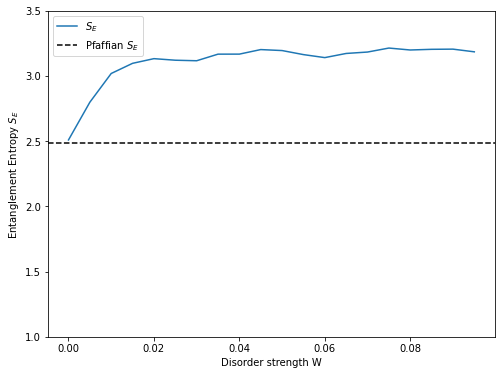

In [87]:
fig,ax=plt.subplots(figsize=(8,6))
plt.plot(noise_strength, S_E, label="$S_E$")
#plt.plot(noise_strength,S_E_model,label="$S_{E,model}$")

plt.ylim(1,3.5)
plt.axhline(S_trial,label='Pfaffian $S_E$',color='black',linestyle='--')
plt.xlabel('Disorder strength W')
plt.ylabel('Entanglement Entropy $S_E$')

plt.legend()

In [86]:
S_E

array([2.50880598, 2.79804849, 3.01831121, 3.09616327, 3.13195977,
       3.11999194, 3.1159012 , 3.16647825, 3.16671375, 3.20154188,
       3.1940647 , 3.16301198, 3.13996415, 3.17179092, 3.18264047,
       3.21320582, 3.19836633, 3.20354625, 3.20490781, 3.18434025])

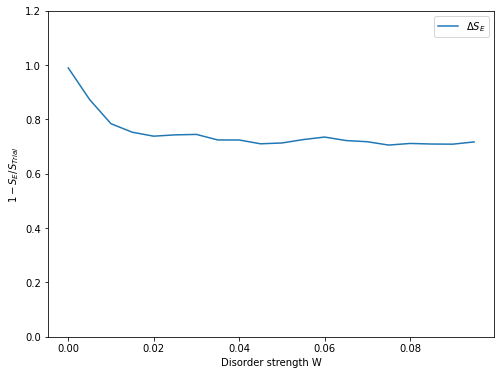

In [88]:
fig,ax=plt.subplots(figsize=(8,6))

plt.plot(noise_strength,1-np.abs(S_E-S_trial)/S_trial ,label="$\Delta S_E$")
plt.ylim(0,1.2)
plt.xlabel('Disorder strength W')
plt.ylabel('$1-S_E/S_{Trial}$')

plt.legend()

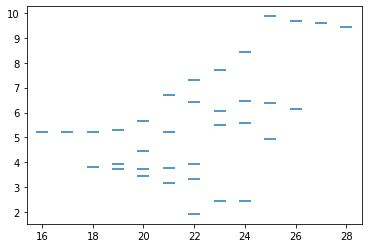

In [76]:
import numpy as np
import matplotlib.pyplot as plt

data=np.loadtxt("test.csv",delimiter=',')

ax=plt.plot(data[:,0], data[:,1], ls="none", marker="_", ms="12", mew="1.5")

In [109]:
eta=np.real(data[:,1])
S_trial=sum(eta*np.exp(-eta))
S_trial

1.9426818750848454

## Rewrite Entanglement Spectrum Functions

In [419]:
def entanglement_spectrum(system,groundstate, subsystemA, NA, LzAvec):
    groundstate /= LA.norm(groundstate)
    dim=len(groundstate)

    IAlist = np.zeros(groundstate.shape[0], dtype=int)
    NAlist = np.zeros(groundstate.shape[0], dtype=int)
    LzAlist = np.zeros(groundstate.shape[0], dtype=float)
    mzA = system.mzvals[subsystemA]

    for i in range(0,dim):
        nsA = system.occ_orbitals_nlist[i][subsystemA]
        IAlist[i] = I(nsA)
        NAlist[i] = np.sum(nsA)
        LzAlist[i] = np.dot(mzA, nsA)
    
    print(f"Calculating entanglement spectrum for NA = {NA}, LzA = {LzAvec} ...")
    
    ent_spectrum = np.zeros((0, 2), dtype=float)
    for LzA in LzAvec:
        strip_inds = np.intersect1d(np.where(NAlist == NA), np.where(LzAlist == LzA))
        IAlist_stripped = IAlist[strip_inds]
        sort_inds = np.argsort(IAlist_stripped,kind="mergesort")
        IAlist_stripped = IAlist_stripped[sort_inds]

        groundstate_stripped = groundstate[strip_inds][sort_inds]
        
        nc = np.sum(IAlist_stripped == IAlist_stripped[0])
        nr = int(groundstate_stripped.shape[0] / nc)
        groundstate_matrix = groundstate_stripped.reshape((nr, nc)).T

        rhoA = np.dot(groundstate_matrix, groundstate_matrix.T)
        evals = LA.eigvals(rhoA)
        xi = -np.log(evals[np.where(evals > 0)])
        
        print(groundstate_matrix)

        ent_spectrum = np.vstack((ent_spectrum, np.hstack((np.full((len(xi), 1), LzA), np.sort(xi).reshape(-1, 1)))))
    return ent_spectrum

ent_spec=entanglement_spectrum(system,eigenstates[:,0], subsystemA, NA, LzAvec)

Calculating entanglement spectrum for NA = 4, LzA = [16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.] ...
[[ 3.63306333e-08 -5.66240949e-07  9.48419274e-07 -8.29057496e-09
   2.02814300e-07 -1.03474347e-07  8.95249517e-08 -2.58582259e-07
   1.09850580e-06 -1.11170915e-06 -2.25002264e-07 -5.70302257e-07
   6.12005646e-07  1.50506565e-06 -8.48988613e-07 -2.15944768e-06
   8.94097636e-07  2.71918825e-06 -2.37971774e-06  2.40565262e-06
   2.58103365e-06 -6.89036235e-06  1.06883935e-05]
 [-5.66240949e-07  8.82530204e-06 -1.47818461e-05  1.29215007e-07
  -3.16101734e-06  1.61272753e-06 -1.39531544e-06  4.03020400e-06
  -1.71210604e-05  1.73268448e-05  3.50683388e-06  8.88860066e-06
  -9.53858016e-06 -2.34576093e-05  1.32321425e-05  3.36566582e-05
  -1.39352015e-05 -4.23806467e-05  3.70897369e-05 -3.74939521e-05
  -4.02274007e-05  1.07391613e-04 -1.66586859e-04]
 [ 9.48419274e-07 -1.47818461e-05  2.47586964e-05 -2.16427306e-07
   5.29451248e-06 -2.70122088e-06  2.33706881e-06 -6.75034747e

In [413]:
Norb=18
mzvals=system.mzvals
subsystemA = np.arange(11,18,dtype=int)
NA=int(4)
LzAvec = np.arange(sum(mzvals[subsystemA][0:NA]),sum(mzvals[subsystemA][NA-1::])+1) #noninclusive endpoint 

Calculating entanglement spectrum for NA = 4, LzA = [16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.] ...
[-1.90605963e-04  2.97074099e-03 -4.97581113e-03  4.34958845e-05
 -1.06405013e-03  5.42870460e-04 -4.69685996e-04  1.35663258e-03
 -5.76322890e-03  5.83249932e-03  1.18045763e-03  2.99204834e-03
 -3.21084207e-03 -7.89621489e-03  4.45415557e-03  1.13293815e-02
 -4.69081670e-03 -1.42660188e-02  1.24850120e-02 -1.26210774e-02
 -1.35412009e-02  3.61497732e-02 -5.60758610e-02]
[-4.69685996e-04 -3.06915587e-03  1.17111480e-03  5.12413801e-03
 -3.62921509e-03 -3.21848557e-04  8.33775343e-05 -5.26490098e-03
  1.22427185e-02  8.96341452e-03 -8.06833175e-03 -1.31508446e-02
  4.60891685e-04  1.42381512e-02  6.73300037e-03 -4.76772864e-03
 -1.28464011e-02 -1.53412383e-02  1.83074136e-02  2.07240396e-02
 -3.10505327e-02  2.68363531e-03  8.60075658e-03 -2.44276749e-02
  4.28683576e-02]
[ 2.99204834e-03 -5.26490098e-03  1.31008495e-02 -6.76278798e-03
 -8.20580264e-03 -1.95966566e-03  3.734663

/Users/logange/miniforge3/envs/tensorflow_silicon/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


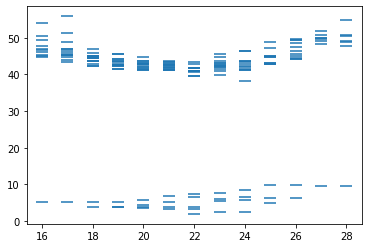

In [414]:
energies, eigenstates=LA.eigh(hamil)
ent_spec=entanglement_spectrum(system,eigenstates[:,0], subsystemA, NA, LzAvec)

ax=plt.plot(ent_spec[:,0], ent_spec[:,1], ls="none", marker="_", ms="12", mew="1.5")